# External modules

In [1]:
library(tidyverse)
library(readr)
library(DescTools)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# Internal functions

In [2]:
path <- ".."

xfun::in_dir(dir = path, expr = source("./src/impute_outliers.R"))
xfun::in_dir(dir = path, expr = source("./src/extract_nlargest_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/extract_block_maxima.R"))
xfun::in_dir(dir = path, expr = source("./src/extract_block_maxima_with_indexes.R"))

xfun::in_dir(dir = path, expr = source("./src/get_standard_scaled_data.R"))
xfun::in_dir(dir = path, expr = source("./src/get_one_hot_encoded_data.R"))
xfun::in_dir(dir = path, expr = source("./src/get_one_hot_encoded_and_standard_scaled_data.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_modes.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_modes.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_gev_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_gev_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_gev_parameters.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_gev_model_quantile.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_single_gev_model.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_several_gev_models.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_ns_gev_parameters.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_single_ns_gev_model.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_several_ns_gev_models.R"))

xfun::in_dir(dir = path, expr = source("./src/get_ns_gev_model_normalized_parameters.R"))
xfun::in_dir(dir = path, expr = source("./src/get_several_ns_gev_model_normalized_parameters.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_gev_mixture_model_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_mixture_model_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_mixture_model_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_gev_mixture_model_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_several_standardized_block_maxima_mean.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_several_ns_standardized_block_maxima_mean.R"))

xfun::in_dir(dir = path, expr = source("./src/plot_several_standardized_block_maxima_mean.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_several_ns_standardized_block_maxima_mean.R"))

xfun::in_dir(dir = path, expr = source("./src/fit_stationary_gev_mixture_model.R"))
xfun::in_dir(dir = path, expr = source("./src/fit_non_stationary_gev_mixture_model.R"))

xfun::in_dir(dir = path, expr = source("./src/plot_fit_stationary_gev_mixture_model.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_fit_non_stationary_gev_mixture_model.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_stationary_gev_mixture_model_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_stationary_gev_mixture_model_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_stationary_gev_mixture_model_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_stationary_gev_mixture_model_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_non_stationary_gev_mixture_model_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_non_stationary_gev_mixture_model_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_non_stationary_gev_mixture_model_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_non_stationary_gev_mixture_model_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_stationary_gev_mixture_model_quantile.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_non_stationary_gev_mixture_model_quantile.R"))

xfun::in_dir(dir = path, expr = source("./src/plot_estimate_stationary_gev_mixture_model_quantile.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_estimate_non_stationary_gev_mixture_model_quantile.R"))

Loading required package: lattice


Attaching package: ‘caret’


The following objects are masked from ‘package:DescTools’:

    MAE, RMSE


The following object is masked from ‘package:purrr’:

    lift




In [29]:
options(repr.plot.width=19, repr.plot.height=12)

# Data

In [3]:
n <- 10000

x <- rexp(n)

# EDA

------------------------------------------------------------------------------ 
x (numeric)

           length                n              NAs           unique'
           10'000           10'000                0              = n
                            100.0%             0.0%                 
                                                                    
              .05              .10              .25           median
  0.0497669341421  0.1033701340802  0.2980578949614  0.7209575158394
                                                                    
            range               sd            vcoef              mad
  9.9089776225023  0.9862278110873  0.9783113474766  0.7417705377055
                                                                    
               0s             mean           meanCI
                0  1.0080919674816  0.9887599174665
             0.0%                   1.0274240174967
                                                   
        

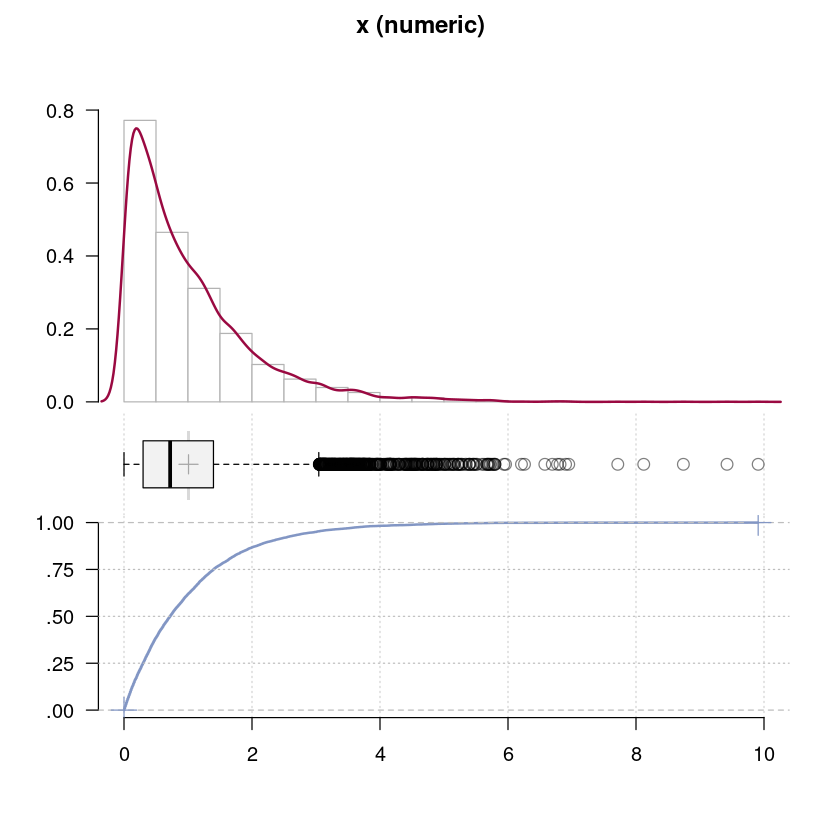

In [4]:
options(repr.plot.width=19, repr.plot.height=12)

Desc(x)

------------------------------------------------------------------------------ 
y (numeric)

       length            n          NAs       unique           0s         mean'
        3'000        3'000            0          = n            0  2.195018362
                    100.0%         0.0%                      0.0%             
                                                                              
          .05          .10          .25       median          .75          .90
  1.278788459  1.329379326  1.503480252  1.885158278  2.575326002  3.504940301
                                                                              
        range           sd        vcoef          mad          IQR         skew
  8.678843839  0.972168413  0.442897622  0.695806630  1.071845750  1.970356099
                                                                              
       meanCI
  2.160216356
  2.229820369
             
          .95
  4.170759097
             
         kurt
  5.

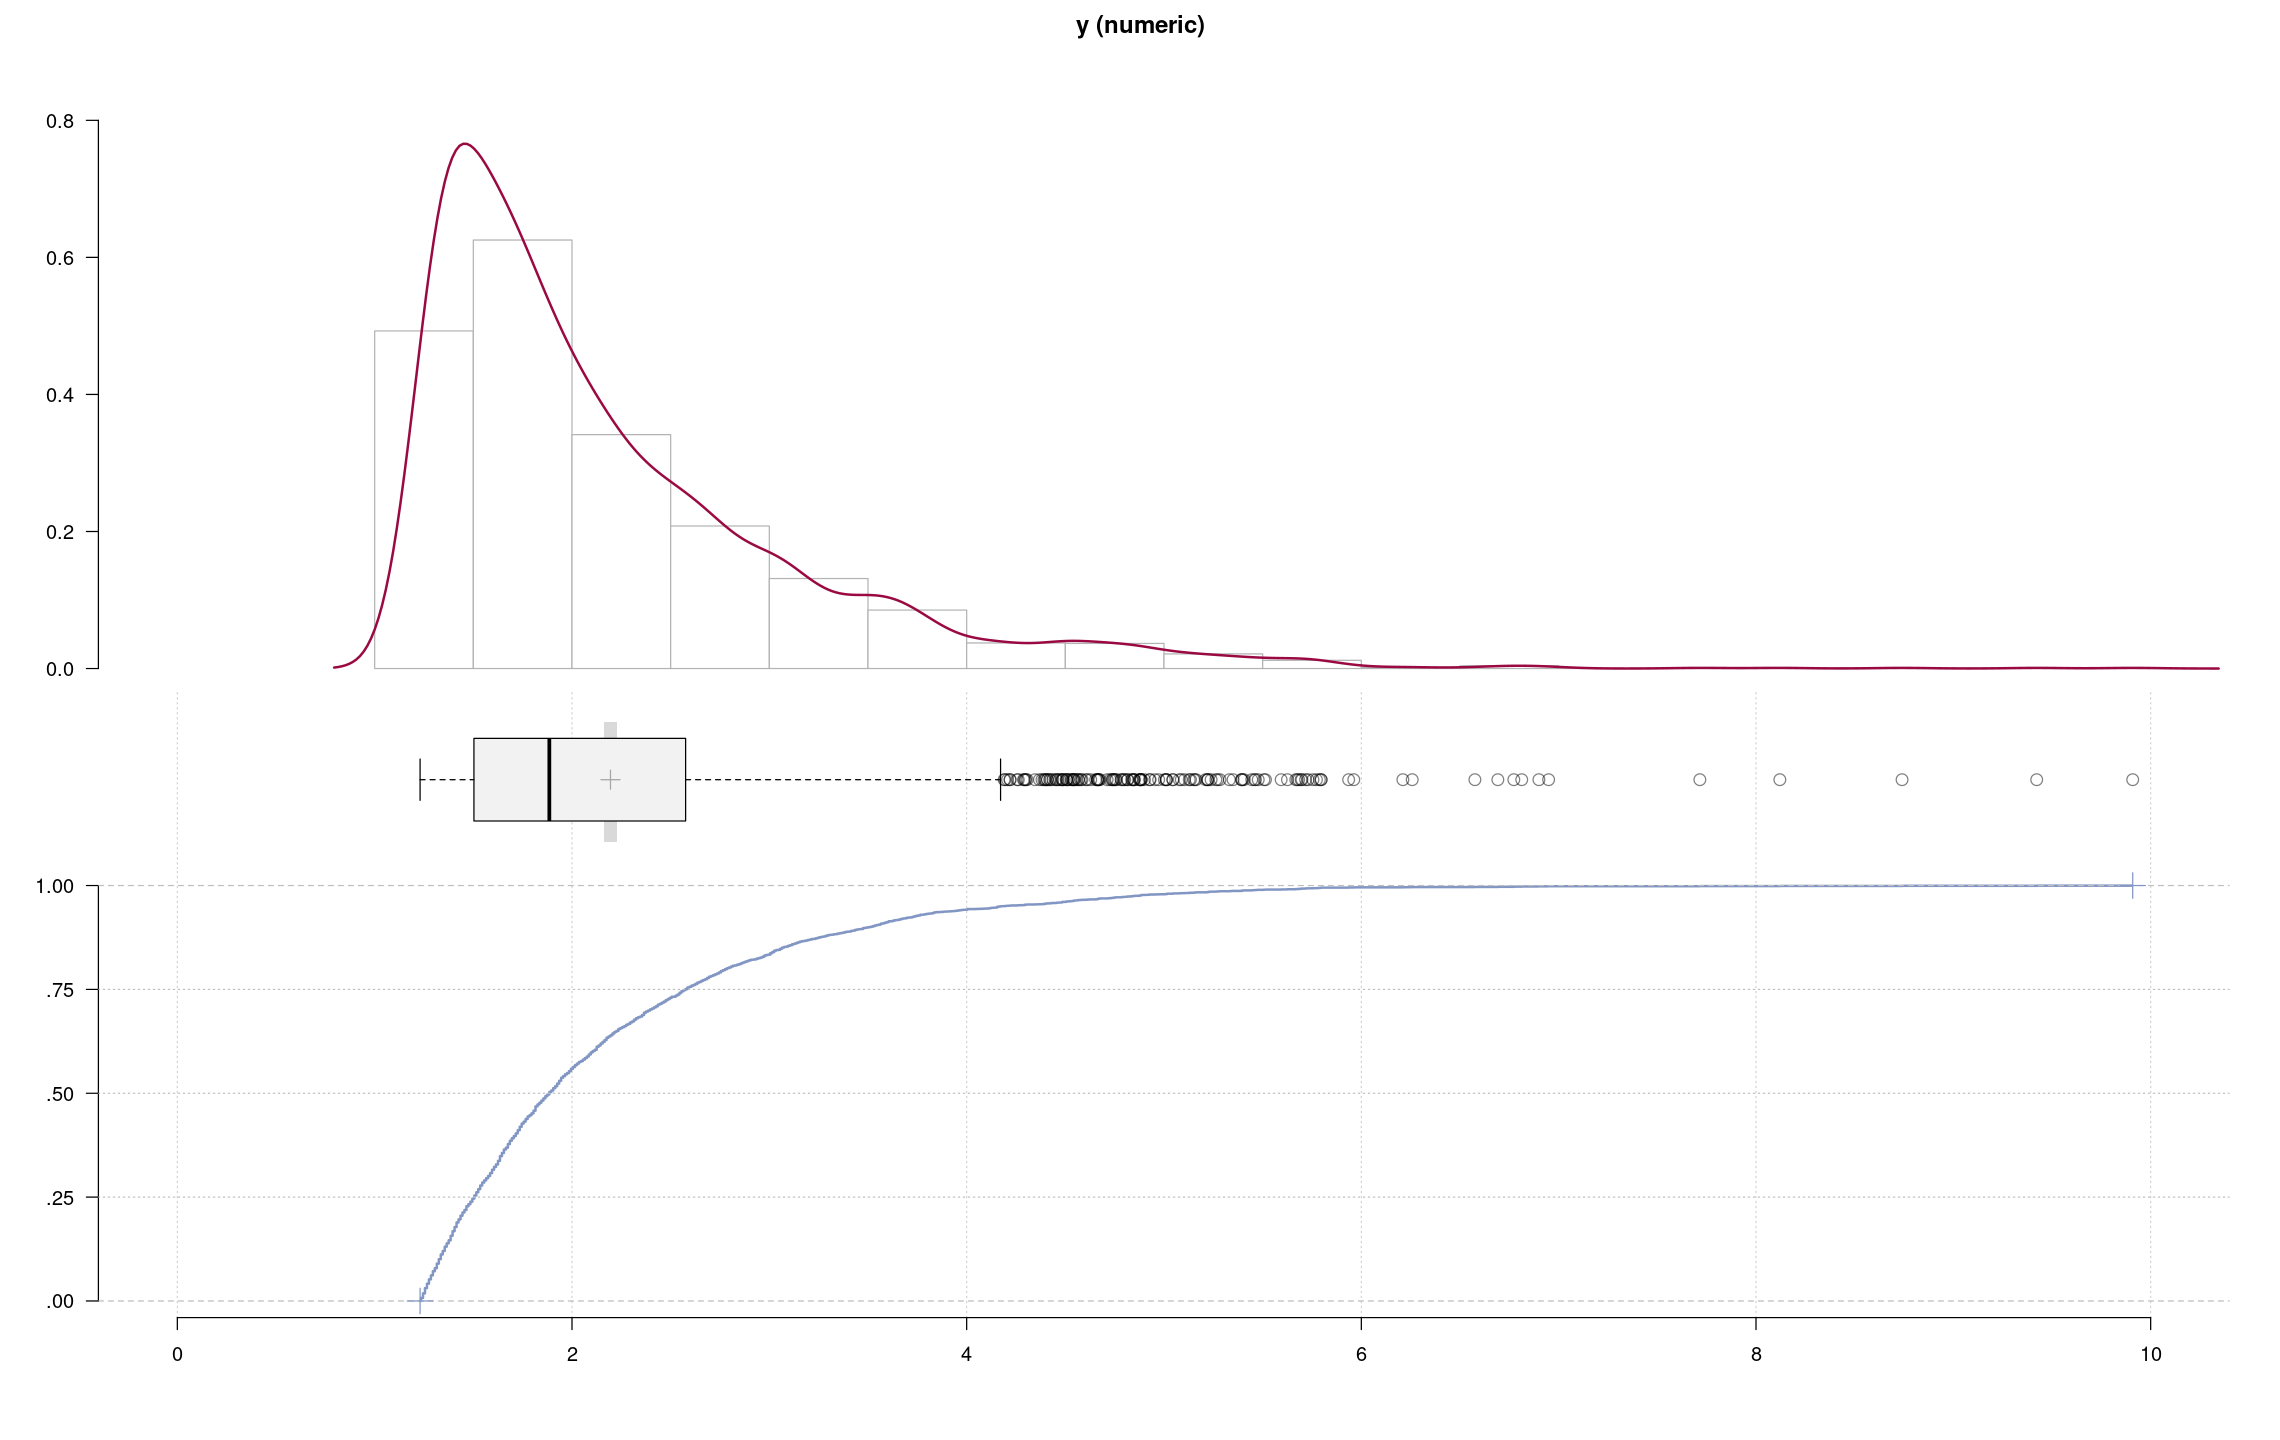

In [8]:
options(repr.plot.width=19, repr.plot.height=12)

nlargest <- 3000
y <- extract_nlargest_sample(x, n = nlargest)
Desc(y)

# Estimation

In [9]:
gev_mixture_model_object <- fit_stationary_gev_mixture_model(x = x,
                                                             nlargest = 3000,
                                                             block_sizes = NULL,
                                                             minimum_nblocks = 50,
                                                             threshold = NULL,
                                                             confidence_level = 0.95,
                                                             use_extremal_index = TRUE,
                                                             use_uniform_prior = TRUE,
                                                             method = c("MLE", "GMLE", "Lmoments")[1])


In [10]:
print(names(gev_mixture_model_object))

 [1] "threshold"                            
 [2] "equivalent_block_sizes"               
 [3] "unequivalent_block_sizes"             
 [4] "selected_block_sizes"                 
 [5] "unselected_block_sizes"               
 [6] "use_uniform_prior"                    
 [7] "weights"                              
 [8] "frequencies"                          
 [9] "use_extremal_index"                   
[10] "extremal_indexes"                     
[11] "negative_log_likelihoods"             
[12] "information_criteria"                 
[13] "unnormalized_gev_parameters_object"   
[14] "normalized_gev_parameters_object"     
[15] "full_normalized_gev_parameters_object"
[16] "partial_data"                         
[17] "all_data"                             
[18] "selected_model_per_obs"               
[19] "selected_gev_models"                  
[20] "several_residuals"                    
[21] "several_residuals_fit"                
[22] "several_residuals_diagnosics"         


In [11]:
print(gev_mixture_model_object$full_normalized_gev_parameters_object)

       loc_star   scale_star       shape_star
21 1.4252405892 0.9258834020  0.0002902227959
28 1.1616129304 1.1204709144 -0.0483559748406
37 0.6910995474 1.3072082956 -0.0724759083780
46 2.5428231837 0.4863943819  0.1204929884077
51 2.9942110275 0.3692047085  0.1668423052058
52 2.6143292391 0.4694527822  0.1284099031243
53 3.3448603719 0.2790922569  0.2204036145863
55 2.4331178445 0.5024540724  0.1211006817939
58 2.7446779159 0.4324620967  0.1392557208706
59 3.3180232646 0.2894842624  0.2054418102947


In [13]:
print(gev_mixture_model_object$weights)

             21              28              37              46              51 
0.0009775171065 0.0205278592375 0.0097751710655 0.0498533724340 0.1681329423265 
             52              53              55              58              59 
0.0713587487781 0.3489736070381 0.1094819159335 0.1710654936461 0.0498533724340 


In [14]:
print(which.max(gev_mixture_model_object$weights))

53 
 7 


In [15]:
print(which.max(gev_mixture_model_object$full_normalized_gev_parameters_object$shape_star))

[1] 7


In [16]:
print(which.min(gev_mixture_model_object$full_normalized_gev_parameters_object$shape_star))

[1] 3


In [17]:
print(gev_mixture_model_object$information_criteria)

        AIC         BIC 
2164.661432 2398.909767 


# Diagnostic

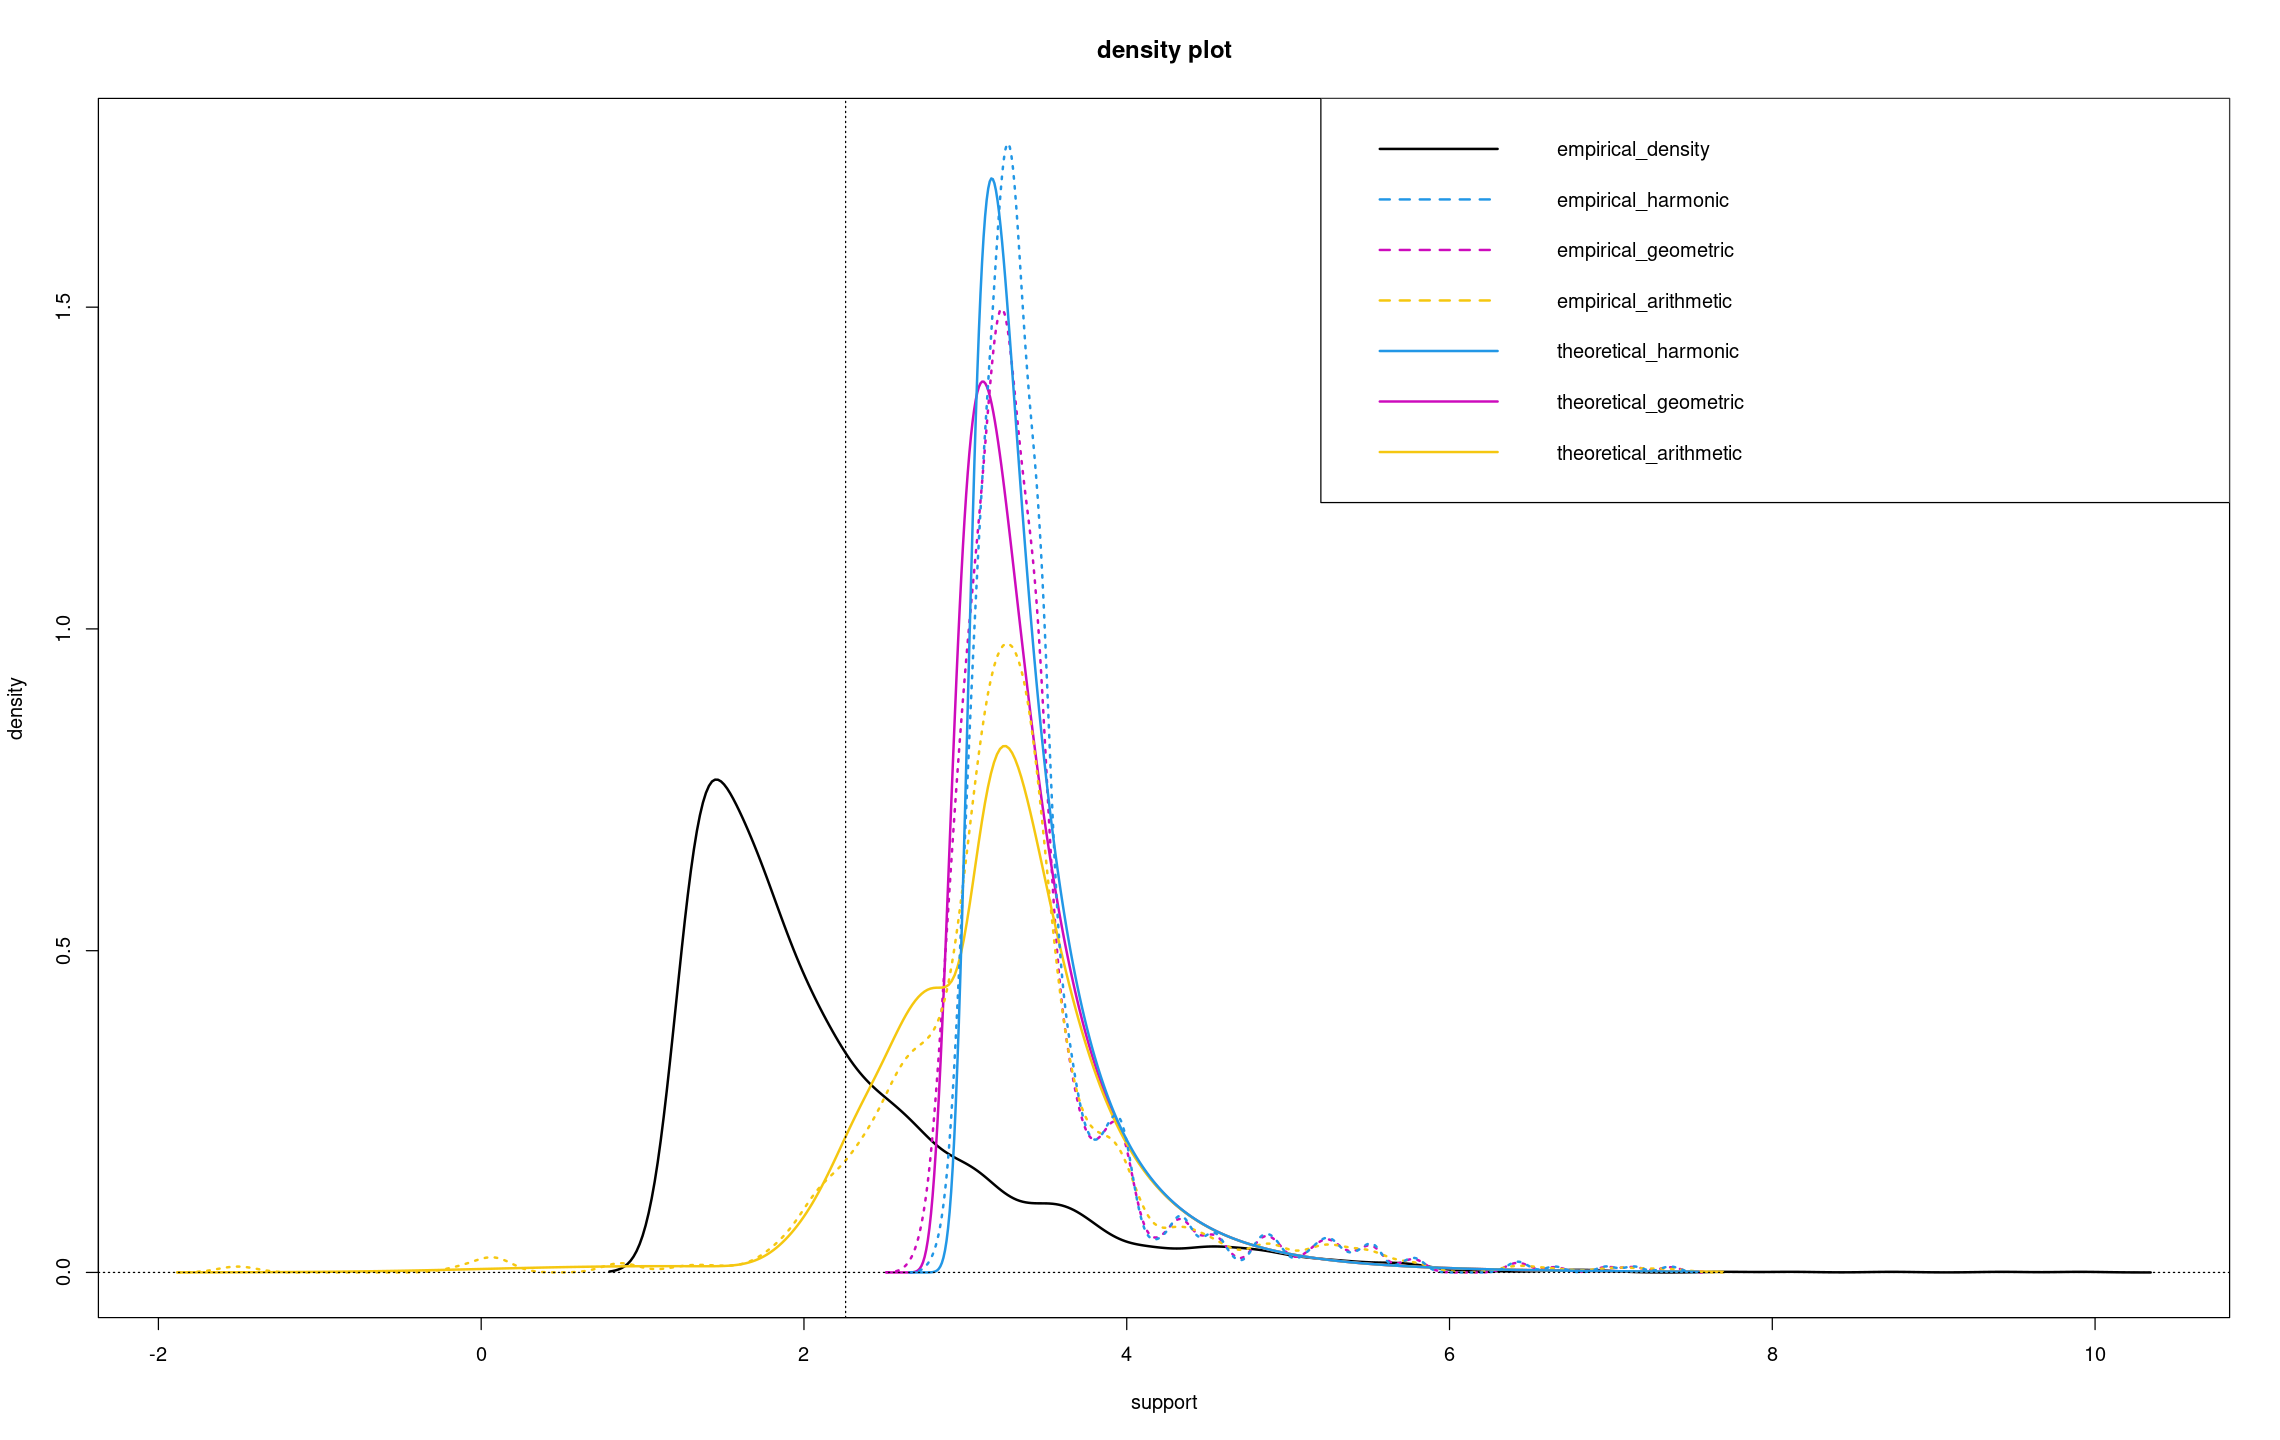

In [19]:
options(repr.plot.width=19, repr.plot.height=12)

plot_fit_stationary_gev_mixture_model(gev_mixture_model_object,
                                      model_index = 0,
                                      iterations = 10,
                                      xlab = "support",
                                      ylab = "density",
                                      main = "density plot",
                                      legend_position = "topright")

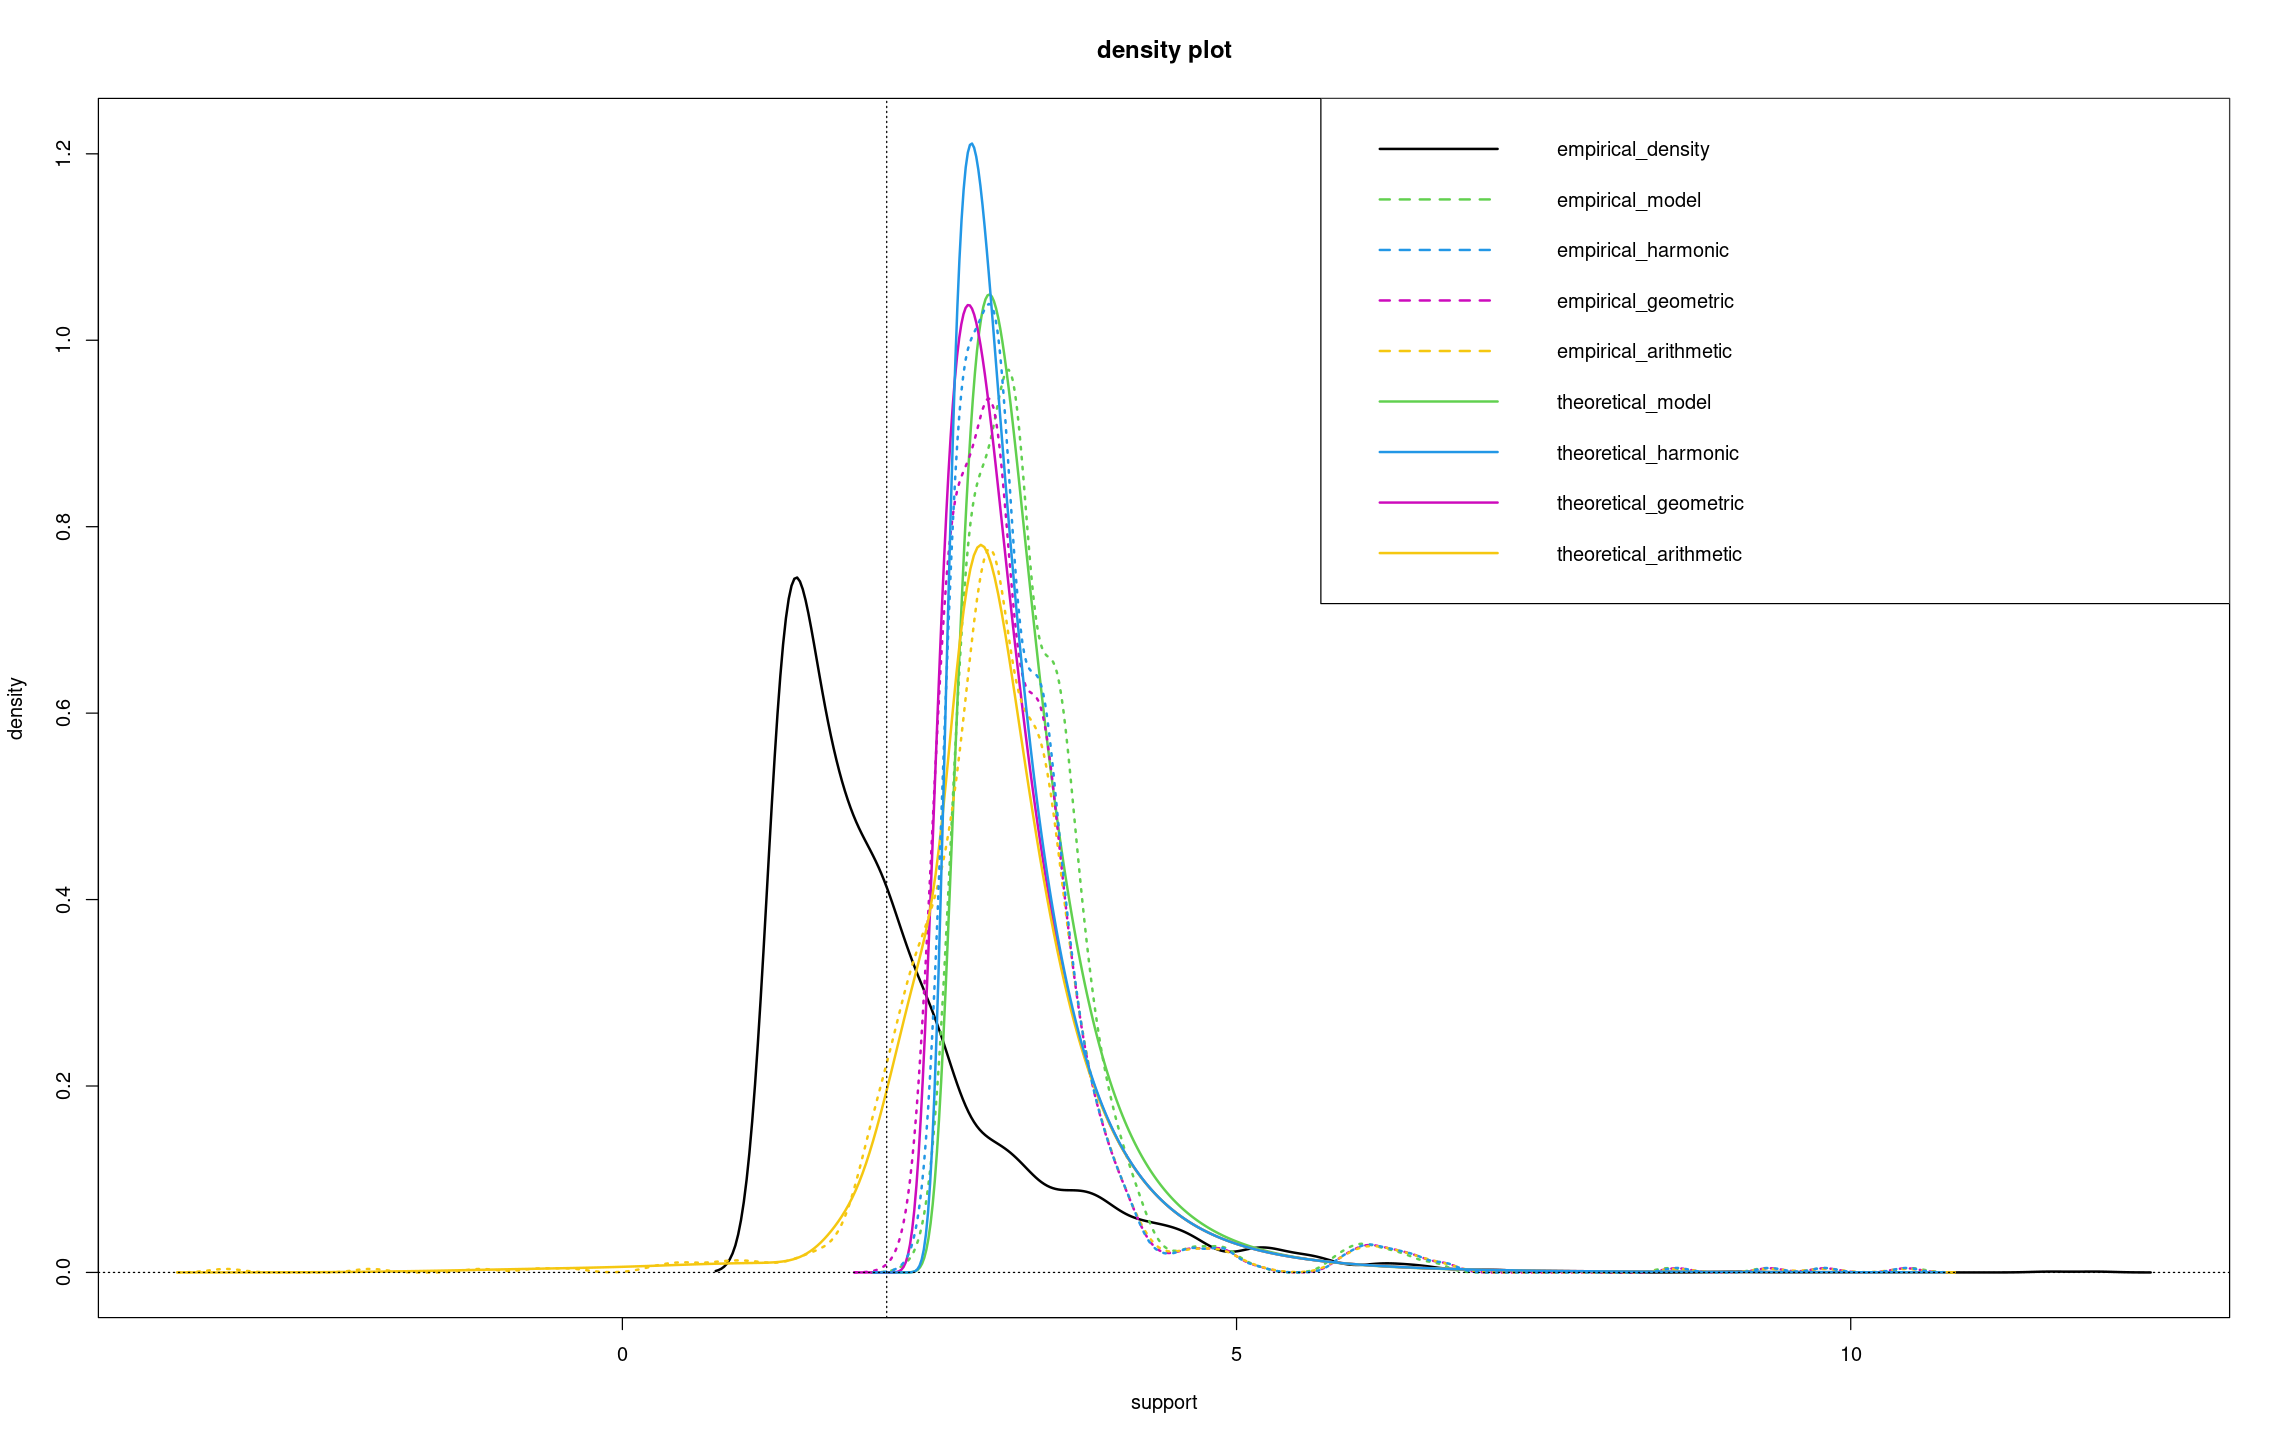

In [16]:
options(repr.plot.width=19, repr.plot.height=12)

plot_fit_stationary_gev_mixture_model(gev_mixture_model_object,
                                      model_index = which.max(gev_mixture_model_object$weights),
                                      iterations = 10,
                                      xlab = "support",
                                      ylab = "density",
                                      main = "density plot",
                                      legend_position = "topright")

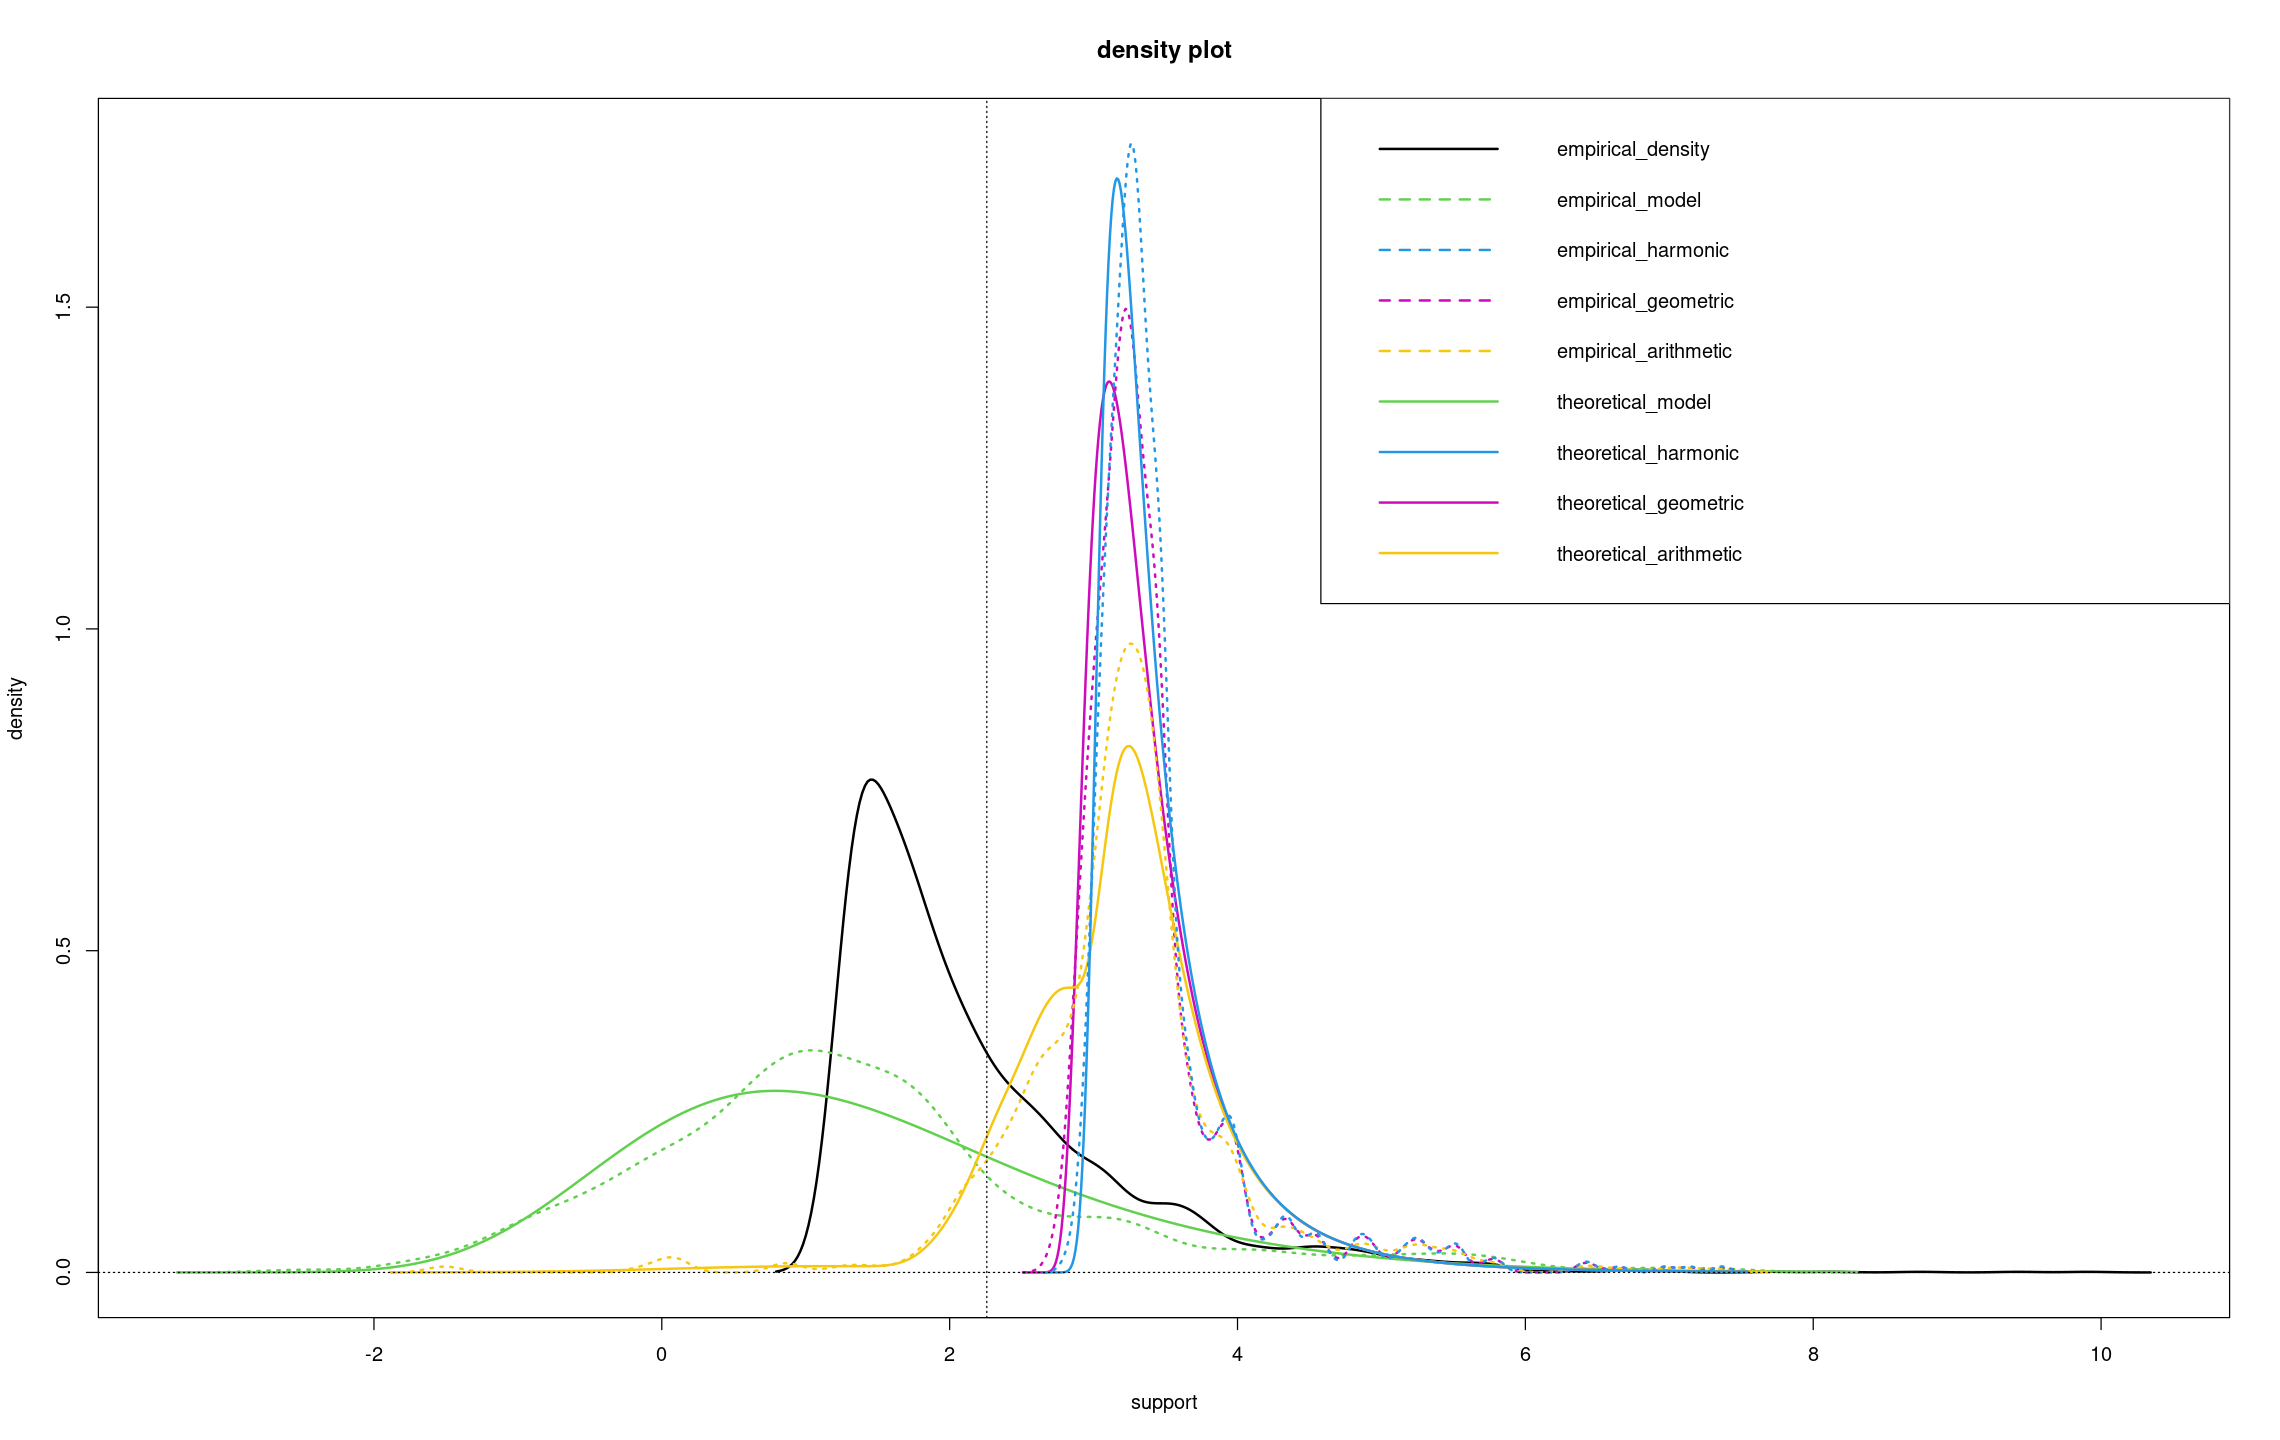

In [20]:
options(repr.plot.width=19, repr.plot.height=12)

plot_fit_stationary_gev_mixture_model(gev_mixture_model_object,
                                      model_index = which.min(gev_mixture_model_object$full_normalized_gev_parameters_object$shape_star),
                                      iterations = 10,
                                      xlab = "support",
                                      ylab = "density",
                                      main = "density plot",
                                      legend_position = "topright")

# Quantiles

In [21]:
alpha <- n^(-2)

print(alpha)

[1] 1e-08


In [22]:
true_quantile <- qexp(p = 1 - alpha)

print(true_quantile)

[1] 18.42068074


In [24]:
results_geometric <- estimate_stationary_gev_mixture_model_quantile(gev_mixture_model_object,
                                                                    alpha = alpha,
                                                                    do.ci = TRUE,
                                                                    confidence_level = 0.95,
                                                                    kind = c("geometric", "arithmetic", "harmonic")[1],
                                                                    iterations = 100)

results_geometric

,lower_bound,estimate,upper_bound
,<dbl>,<dbl>,<dbl>
21,3.466785810,17.40579946,31.34481311
28,5.917623022,14.25481798,22.59201294
37,5.641543123,13.54862506,21.45570699
46,-23.201365800,30.64061222,84.48259024
51,-42.469506958,39.90964791,122.28880277
52,-31.702680847,32.31156047,96.32580179
53,-90.600631653,58.37929456,207.35922077
55,-32.824798067,31.66006245,96.14492297
58,-35.766603527,33.78748292,103.34156937


In [25]:
results_arithmetic <- estimate_stationary_gev_mixture_model_quantile(gev_mixture_model_object,
                                                                     alpha = alpha,
                                                                     do.ci = TRUE,
                                                                     confidence_level = 0.95,
                                                                     kind = c("geometric", "arithmetic", "harmonic")[2],
                                                                     iterations = 100)

results_arithmetic

,lower_bound,estimate,upper_bound
,<dbl>,<dbl>,<dbl>
21,3.466785810,17.40579946,31.34481311
28,5.917623022,14.25481798,22.59201294
37,5.641543123,13.54862506,21.45570699
46,-23.201365800,30.64061222,84.48259024
51,-42.469506958,39.90964791,122.28880277
52,-31.702680847,32.31156047,96.32580179
53,-90.600631653,58.37929456,207.35922077
55,-32.824798067,31.66006245,96.14492297
58,-35.766603527,33.78748292,103.34156937


In [26]:
results_harmonic <- estimate_stationary_gev_mixture_model_quantile(gev_mixture_model_object,
                                                                     alpha = alpha,
                                                                     do.ci = TRUE,
                                                                     confidence_level = 0.95,
                                                                     kind = c("geometric", "arithmetic", "harmonic")[3],
                                                                     iterations = 100)

results_harmonic

,lower_bound,estimate,upper_bound
,<dbl>,<dbl>,<dbl>
21,3.466785810,17.40579946,31.34481311
28,5.917623022,14.25481798,22.59201294
37,5.641543123,13.54862506,21.45570699
46,-23.201365800,30.64061222,84.48259024
51,-42.469506958,39.90964791,122.28880277
52,-31.702680847,32.31156047,96.32580179
53,-90.600631653,58.37929456,207.35922077
55,-32.824798067,31.66006245,96.14492297
58,-35.766603527,33.78748292,103.34156937


In [121]:
options(repr.plot.width=23, repr.plot.height=6)

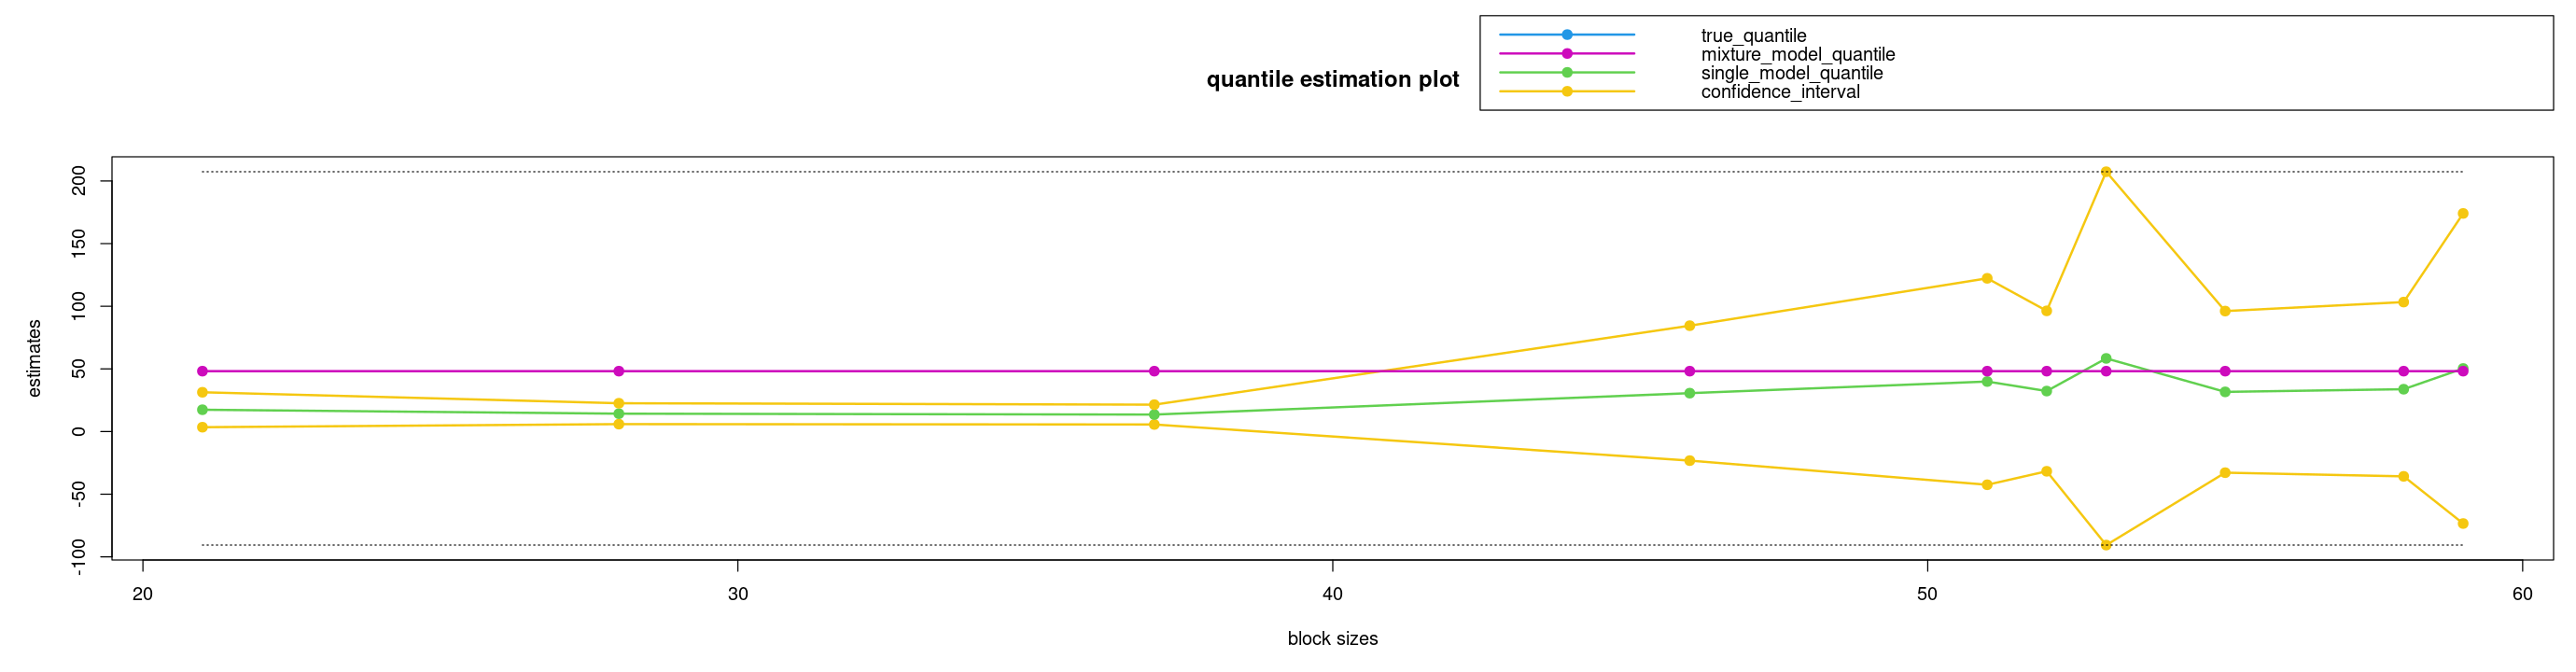

In [27]:
options(repr.plot.width=23, repr.plot.height=6)

plot_estimate_stationary_gev_mixture_model_quantile(gev_mixture_model_object,
                                                    alpha = alpha,
                                                    true_quantile = NULL,
                                                    do.ci = TRUE,
                                                    confidence_level = 0.95,
                                                    kind = c("geometric", "arithmetic", "harmonic")[1],
                                                    iterations = 100,
                                                    xlab = "block sizes",
                                                    ylab = "estimates",
                                                    main = "quantile estimation plot",
                                                    legend_position = "topright")

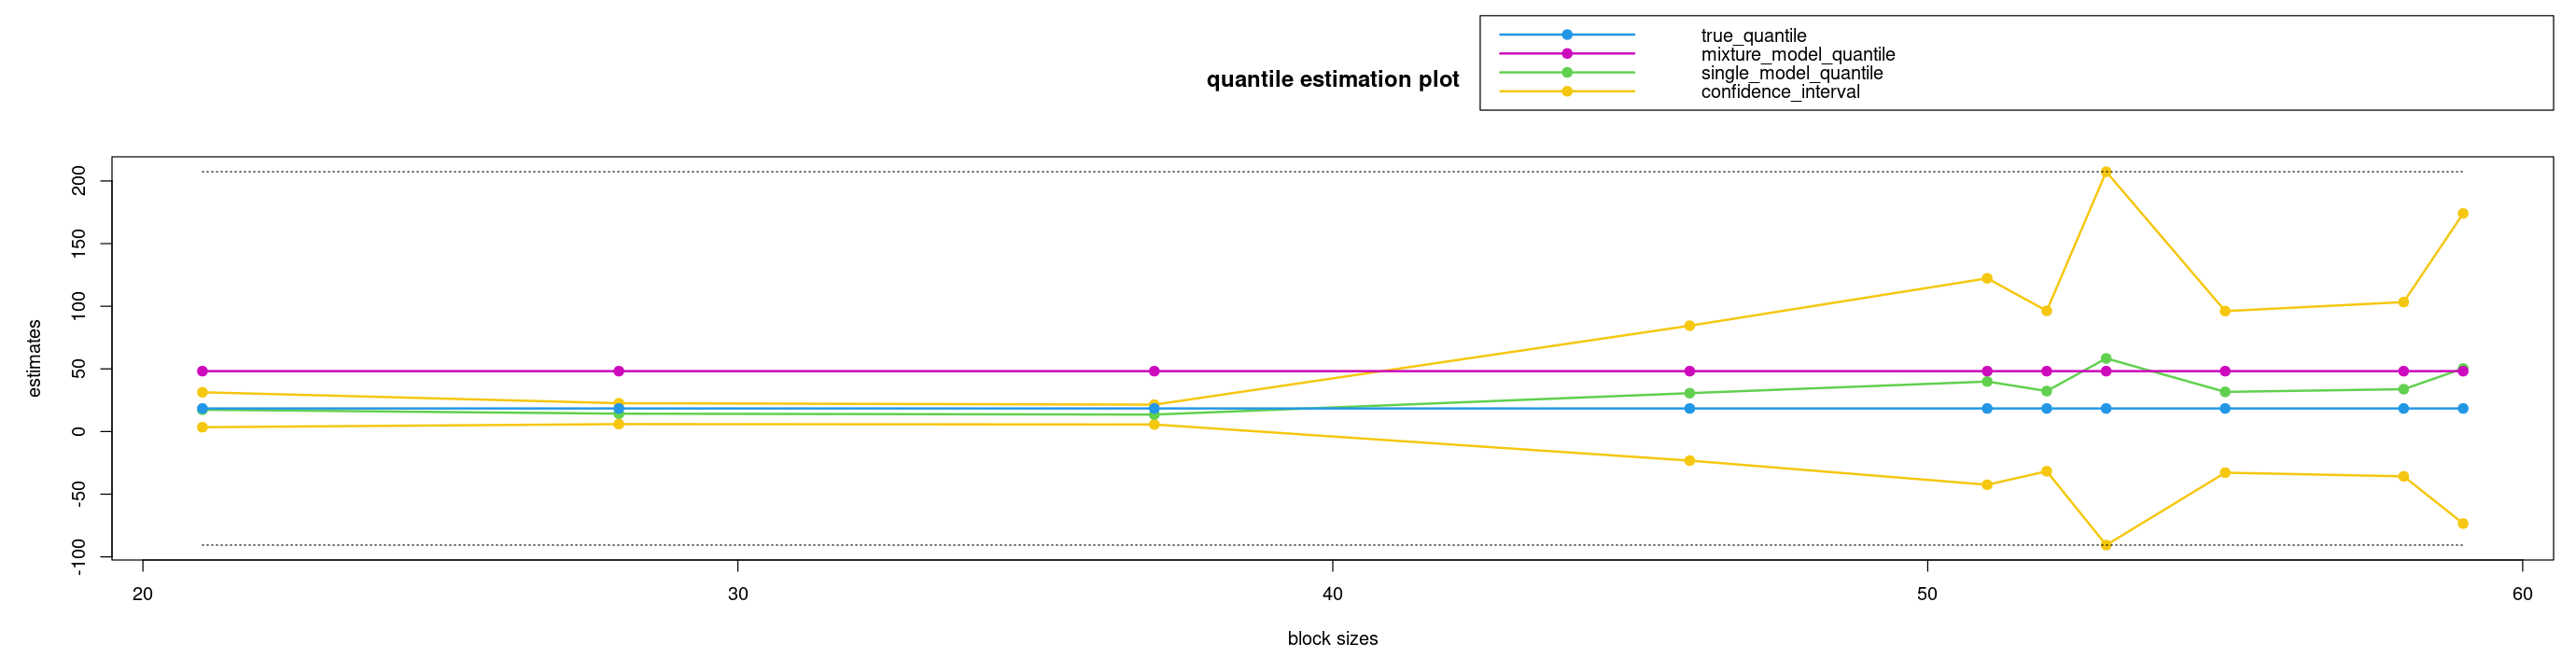

In [28]:
options(repr.plot.width=23, repr.plot.height=6)

plot_estimate_stationary_gev_mixture_model_quantile(gev_mixture_model_object,
                                                    alpha = alpha,
                                                    true_quantile = true_quantile,
                                                    do.ci = TRUE,
                                                    confidence_level = 0.95,
                                                    kind = c("geometric", "arithmetic", "harmonic")[1],
                                                    iterations = 100,
                                                    xlab = "block sizes",
                                                    ylab = "estimates",
                                                    main = "quantile estimation plot",
                                                    legend_position = "topright")
